<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/ThreeMovingAverages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Algorithmic Trading Strategy Using Three Moving Averages 
# Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [71]:
# Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo',start='2020-01-01', end='2021-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-03-01,719.000000,685.049988,690.109985,718.429993,27009700.0,718.429993
2021-03-02,721.109985,685.000000,718.280029,686.440002,23617600.0,686.440002
2021-03-03,700.700012,651.710022,687.989990,653.200012,29957200.0,653.200012


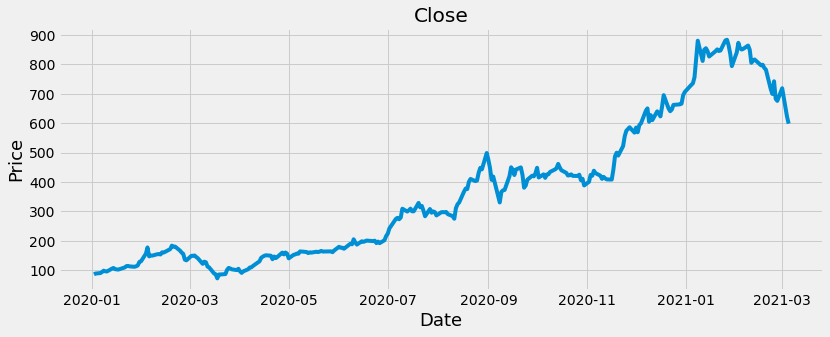

In [72]:
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Close')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [73]:
# Calculate the three moving averages
#Calculate ther Short / Fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the Middle / Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the Long / Slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust=False).mean()


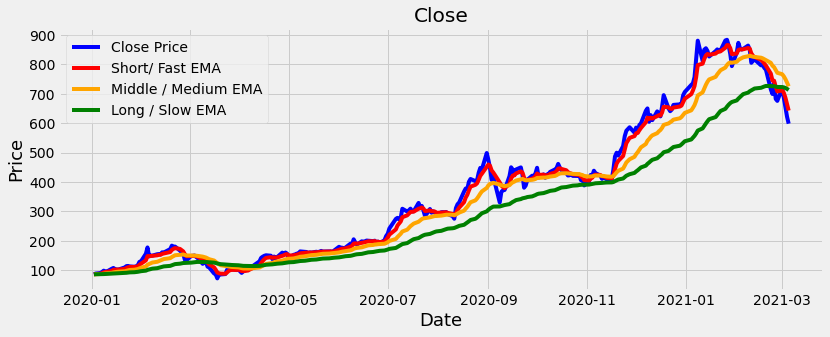

In [74]:
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Close')
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange')
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green')
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [75]:
# Add the EMV to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA
df

,High,Low,Open,Close,Volume,Adj Close,Short,Middle,Long
Date,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,86.052002,86.052002,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,86.902000,86.283820,86.131689
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,88.037333,86.649654,86.262199
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,89.962221,87.300776,86.498130
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,92.784148,88.312342,86.870939
...,...,...,...,...,...,...,...,...,...
2021-03-01,719.000000,685.049988,690.109985,718.429993,27009700.0,718.429993,711.127955,766.157226,722.526937
2021-03-02,721.109985,685.000000,718.280029,686.440002,23617600.0,686.440002,702.898637,758.910206,721.399220
2021-03-03,700.700012,651.710022,687.989990,653.200012,29957200.0,653.200012,686.332429,749.300188,719.267995


In [59]:
#Create the function to buy and sell the stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)

In [76]:
#Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

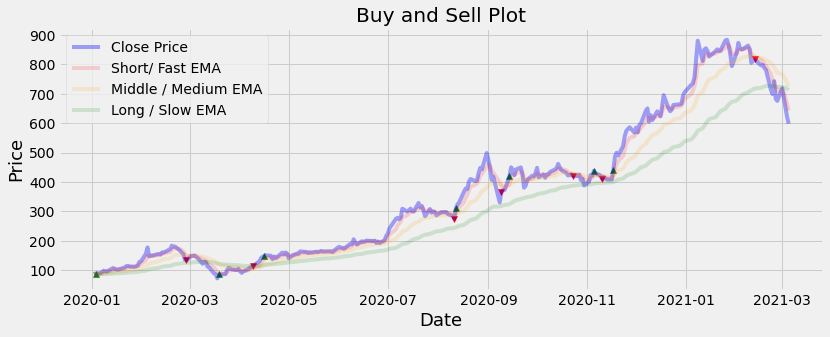

In [77]:
#Visually show the stock buy 
# Visually show the Adj Close 
plt.figure(figsize=(12.2,4.5))
plt.title('Buy and Sell Plot')
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/ Fast EMA', color = 'red', alpha = 0.15)
plt.plot(MiddleEMA, label = 'Middle / Medium EMA', color = 'orange', alpha = 0.15)
plt.plot(LongEMA, label = 'Long / Slow EMA', color = 'green', alpha = 0.15)
plt.scatter(df.index, df['Buy'], color='green', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', marker = 'v', alpha = 1)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

